In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
class_names=np.array(["pos_1","pos_2","pos_3","pos_4","pos_5","pos_6","pos_7","pos_8","pos_9"])
print(class_names)

['pos_1' 'pos_2' 'pos_3' 'pos_4' 'pos_5' 'pos_6' 'pos_7' 'pos_8' 'pos_9']


In [3]:
current_dir=os.getcwd()
print(current_dir)

e:\pythonProject\dumE classifier


In [5]:
model_dir = "E:\pythonProject\dumE classifier\dumEimageclassifier.h5"
#model_dir=os.path.join(current_dir,"dumEimageclassifier.h5")
print(model_dir)

E:\pythonProject\dumE classifier\dumEimageclassifier.h5


In [6]:
#os.chdir("/content/drive/MyDrive/dumE image Classifier")
new_model = load_model(model_dir)

In [7]:
# try to leaern these things
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

In [8]:

cam_port = 0
cam = cv2.VideoCapture(cam_port, cv2.CAP_DSHOW)

# Check if the camera is opened successfully
if not cam.isOpened():
    print("Error: Could not open camera.")
else:
    # Reading the input using the camera
    result, image = cam.read()

    # Check if the read operation was successful
    if result:
        cv2.imwrite("position.jpg", image)
        print("Image captured and saved as position.jpg.")
    else:
        print("Error: Could not read from the camera.")

    # Release the camera
    cam.release()

# It's also a good practice to close any OpenCV windows that may be open
cv2.destroyAllWindows()

Error: Could not open camera.


In [9]:
img_name="position.jpg"
img_path=os.path.join(current_dir,img_name)
image = load_and_resize_image(img_path, 240)

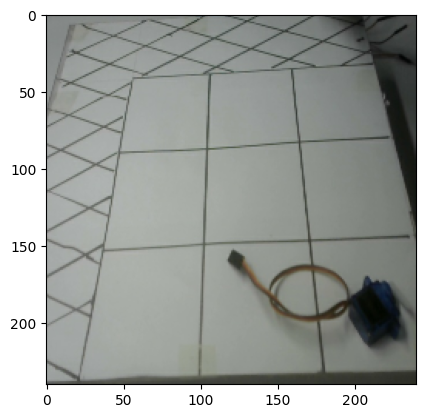

In [10]:
plt.imshow(image)

In [11]:
new_pred=new_model.predict(tf.expand_dims(image, axis=0))
new_pred

1/1 [==============================] - 1s 534ms/step


array([[0.0000000e+00, 0.0000000e+00, 3.2911334e-08, 0.0000000e+00,
        8.3970297e-37, 9.9904829e-01, 0.0000000e+00, 0.0000000e+00,
        9.5165474e-04]], dtype=float32)

In [12]:
a = new_pred[0].argmax() + 1
a

6

In [13]:
new_pred_name=class_names[new_pred[0].argmax()]
new_pred_name

'pos_6'

In [14]:
import serial
import time

SerialObj = serial.Serial('COM3') 

SerialObj.baudrate = 9600  
SerialObj.bytesize = 8     
SerialObj.parity   ='N'    
SerialObj.stopbits = 1    


time.sleep(3)   

if new_pred_name == 'pos_1':
    BytesWritten = SerialObj.write(b'1')
elif new_pred_name == 'pos_2':
    BytesWritten = SerialObj.write(b'2')
elif new_pred_name == 'pos_3':
    BytesWritten = SerialObj.write(b'3')
elif new_pred_name == 'pos_4':
    BytesWritten = SerialObj.write(b'4')
elif new_pred_name == 'pos_5':
    BytesWritten = SerialObj.write(b'5')
elif new_pred_name == 'pos_6':
    BytesWritten = SerialObj.write(b'6')
elif new_pred_name == 'pos_7':
    BytesWritten = SerialObj.write(b'7')
elif new_pred_name == 'pos_8':
    BytesWritten = SerialObj.write(b'8')
elif new_pred_name == 'pos_9':
    BytesWritten = SerialObj.write(b'9')
    
print('BytesWritten = ', BytesWritten)

SerialObj.close()         

BytesWritten =  1
